In [51]:
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import glob, os
import cv2
import tempfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 

### To Read the data

### 3. Read Data 

#### 3.1 Reading Image Data

In [24]:
base_path = '/home/jupyter/ML_Specialization_UseCase_3'
number_train_sample = len(os.listdir(base_path+'/train/'))
#number_test_sample = len(os.listdir(base_path+'/test/'))
print('Number of training smaple: {}'.format(number_train_sample))
#print('Number of test smaple: {}'.format(number_test_sample))

Number of training smaple: 101


In [25]:
def read_image_data(file_dir):
    y =[] # store the image label in the list "y" if it is cat then 0 else 1
    list_file_name = os.listdir(file_dir)
    for file in list_file_name:
        if file.split('.')[0]=='dog':
            y.append(1)
        else:
            y.append(0)
    return list_file_name,y

In [27]:
x_tr,y_tr = read_image_data('train')

In [28]:
data_dict = {'fileName':x_tr,'label':y_tr}
#let's create a dataframe with filenames and their corresponding labels.
tr_df = pd.DataFrame(data=data_dict)
tr_df['Category'] = tr_df['label'].apply(lambda x: "cat" if x == 0 else "dog")

In [29]:
tr_df.head()

,fileName,label,Category
0,cat.0.jpg,0,cat
1,cat.19.jpg,0,cat
2,dog.12454.jpg,1,dog
3,dog.12476.jpg,1,dog
4,cat.4.jpg,0,cat


In [30]:
tr_df.tail()

,fileName,label,Category
96,cat.32.jpg,0,cat
97,dog.12497.jpg,1,dog
98,cat.36.jpg,0,cat
99,cat.44.jpg,0,cat
100,dog.12460.jpg,1,dog


In [36]:
list_tr_files = os.listdir(path='train')
#list_tr_files

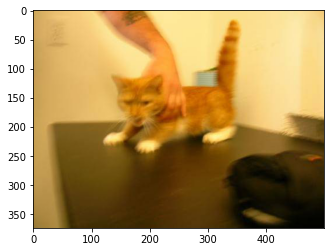

In [39]:
single_cat_image = plt.imread(base_path+'/train/'+list_tr_files[0])
plt.imshow(single_cat_image)
plt.show()

In [40]:
print('Shape of Single Cat Image: {}'.format(single_cat_image.shape))

Shape of Single Cat Image: (374, 500, 3)


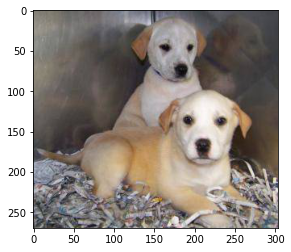

In [45]:
single_dog_image = plt.imread(base_path+'/train/'+list_tr_files[2])
plt.imshow(single_dog_image)
plt.show()

In [46]:
print('Shape of Single dog Image: {}'.format(single_dog_image.shape))

Shape of Single dog Image: (270, 304, 3)


#### Image size are of  different or same shape?

In [48]:
#shape of all the image
#s = plt.imread(tr_path+x_tr[0])
dim1 = [] # to store the array value of the width of the image
dim2 = [] # to store the array value of the length of the image
tr_path = 'train/'
for file_name_img in x_tr:
    #print(file_name_img)
    img = plt.imread(tr_path + file_name_img)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

#### Univariant analysis of Height (dim1) of an Image 

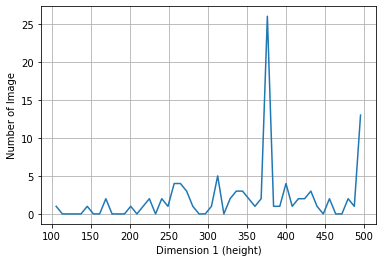

In [53]:
height_hist,height_bins = np.histogram(dim1,bins=50)
height_bin_cntrs = (height_bins[1:]+height_bins[:-1])*0.5
plt.plot(height_bin_cntrs, height_hist)
plt.xlabel('Dimension 1 (height)')
plt.ylabel('Number of Image')
plt.grid()
plt.show()

- __Observations:__
    - __Height of all of the images lies between 160 to 490.__
    - __Most of the image height lies between 360 to 410.__

#### Univariant analysis of Width (dim2) of an Image 

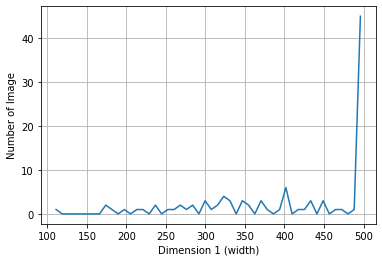

In [54]:
width_hist,width_bins = np.histogram(dim2,bins=50)
width_bin_cntrs = (width_bins[1:]+width_bins[:-1])*0.5
plt.plot(width_bin_cntrs, width_hist)
plt.xlabel('Dimension 1 (width)')
plt.ylabel('Number of Image')
plt.grid()
plt.show()

- __Observations:__
    - __Width of all of the images lies between 180 to 490.__
    - __Most of the image width lies between 480 to 490.__

#### Analysis of dimension2 (width) and dimension 1 (Height) of each image

<Figure size 720x360 with 0 Axes>

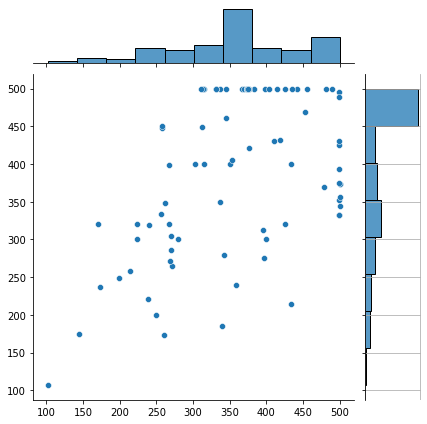

In [56]:
# Plot histogram to check the shape of each image
plt.figure(figsize=(10,5))
sns.jointplot(x= dim1,y =dim2)
plt.xlabel('Dimension 1 (Height)')
plt.ylabel('Dimension 2 (Width)')
plt.grid()
plt.show()

- __Observations:__
    - __From the above visualization, could see that all the image size are not the same shape.__
    - __All the images are of size between dim1 (Height) (100 to 500) and dim2(100 to 400).__
    - __There are two outliers, whose sizes are almost (100,100) and (160,150) respectively.__

In [57]:
Category = tr_df['Category'].tolist()

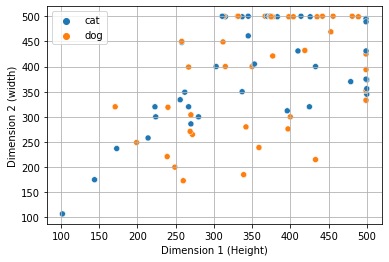

In [59]:
sns.scatterplot(x= dim1,y= dim2,hue = Category )
plt.xlabel('Dimension 1 (Height)')
plt.ylabel('Dimension 2 (width)')
plt.grid()
plt.show()

- __Observation:__
    - __Blue Color: denotes the cats.__
    - __Orange Color: denotes the dogs.__
    - __There is two outliers with smaller size__

In [60]:
#average shape of image
print("Avergae shape of an image: ({},{},{})".format(np.mean(dim1),np.mean(dim2),colors))

Avergae shape of an image: (361.8217821782178,407.7029702970297,3)


- __Summary:(need to modify)__
    - __The images are not of the same shape.__
    - __We could see, few of the images are very small as compared the others (i.e.,with respect to average shape of the image).__
    - __So need to perform the following to make it of same shape:__
        - __if it is smaller pic then perform padding.__
        - __if it is larger pic then perform crop or shrink.__

#### Feature Engineering (Data Augmentation)

- __Crop an Image__

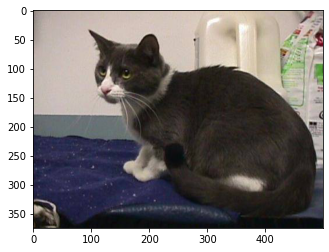

In [67]:
#original image
img_4 = plt.imread(tr_path+x_tr[4])
plt.imshow(img_4)
plt.show()

In [70]:
import tensorflow as tf
tf.__version__

'2.6.2'

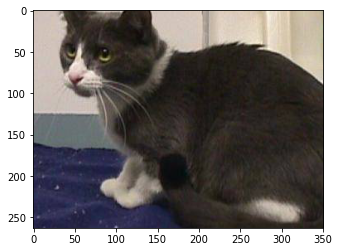

In [73]:
import tensorflow as tf
img_4 = plt.imread(tr_path+x_tr[4])
cropped = tf.image.central_crop(img_4, central_fraction=0.7)
#let's see the cropped image
plt.imshow(cropped)

- __Flip an Image__

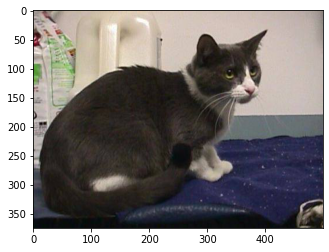

In [74]:
#flip an Image --- left and right
flip_img_4 = tf.image.flip_left_right(img_4)
plt.imshow(flip_img_4)

- __Grayscale an image__

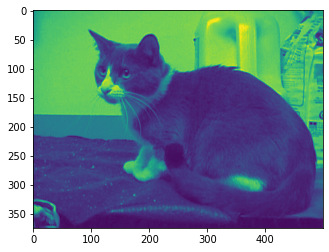

In [75]:
gray_scale_img_4 = tf.image.rgb_to_grayscale(img_4)
plt.imshow(gray_scale_img_4)
plt.show()

- __Rotate an Image__

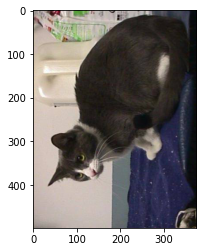

In [76]:
rotate_img_4 = tf.image.rot90(img_4)
plt.imshow(rotate_img_4)
plt.show()

- __Changes Image Brightness__

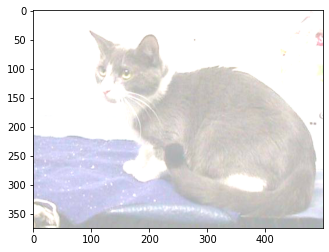

In [77]:
bright_img_4 = tf.image.adjust_brightness(img_4, 0.65)
plt.imshow(bright_img_4)
plt.show()

- __Blurring an image__

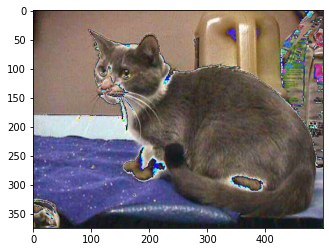

In [80]:
mod_img_4 = img_4*2
plt.imshow(mod_img_4)
plt.show()

In [81]:
base_path

'/home/jupyter/ML_Specialization_UseCase_3'

In [90]:
sample_path ='Sample Augmented data/'
sample_path

'Sample Augmented data/'

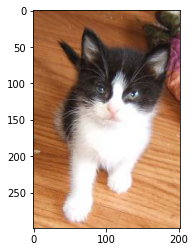

In [91]:
#let's take an example of another (original) image with all the augmentation technique:
img_3842 = plt.imread(sample_path+'cat.3842.jpg')
plt.imshow(img_3842)
plt.show()

In [92]:
img_3842.shape

(299, 202, 3)

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [94]:
data_aug_img_4 = ImageDataGenerator(rotation_range=90,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                   )

In [100]:
img_3842_pil = load_img(sample_path+'cat.3842.jpg')
#convert the PIL image to numpy array
img_3842_array = img_to_array(img_3842_pil)

In [101]:
#shape of pil image array i.e this is a numpy array of size (414,500,3)
img_3842_array.shape

(299, 202, 3)

In [102]:
img_3842_array = img_3842_array.reshape((1,) + img_3842_array.shape)

(1, 299, 202, 3)

In [103]:
img_3842_array.shape

(1, 299, 202, 3)

In [104]:
#generating the 10 sample of the above image after agumentation
num_sample=0
for batch in data_aug_img_4.flow(img_3842_array,
                                batch_size=1,
                                save_to_dir='Sample Augmented data',
                                save_prefix='cat',
                                save_format='jpg'):
    num_sample+=1
    #create 9 sample of the image
    if num_sample>9:
        break 